<a href="https://colab.research.google.com/github/javierblancotech/AnalizadorTextoPython/blob/main/Clasificar_web_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasifica web con Transformers 🤖

1. Incluye en el código la url de la web que quieres analizar y pulsa el play => el script comenzará a scrapear
2. En el módulo 2 define las categorias y pulsa el play => el scrip clasificará la web.
3. Repite el paso 2 las veces que quieras modificando las categorías.
<br>

**Nota:** Vaaaale, lo admito... este colab es una la mera excusa para experimentar con Transformers... 🤖.

<br>
Un saludo desde Mallorca,

[Jose Gris](https://twitter.com/JoseGrisSEO) 😎


<br>

---

Si te son útiles mis colabs [invítame a un café](https://www.buymeacoffee.com/josegris)

---

In [ ]:
#------------------------------------------------------------------------------------
url = "https://10mejores.top/" # Cambia la url por la que quieras clasificar ej url = 'https://www.debelareabogados.es/'
#------------------------------------------------------------------------------------
zeroShotClassifier = 'Recognai/zeroshot_selectra_medium' # Para usar este colab en otro idioma selecciona otro modelo zero-shot-classifier https://huggingface.co/models?pipeline_tag=zero-shot-classification&sort=downloads

# En esta parte scrapeamos web y bajamos liberías
!pip install advertools
import pandas as pd
from advertools import crawl

!rm -rf web.jl
crawl(url, 'web.jl', follow_links=True)

web = pd.read_json("web.jl", lines=True)

!pip install transformers
from transformers import pipeline
from statistics import mean
classifier = pipeline("zero-shot-classification", model=zeroShotClassifier)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 310 kB 4.4 MB/s 
     |████████████████████████████████| 271 kB 39.9 MB/s 
     |████████████████████████████████| 3.1 MB 49.3 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 254 kB 46.8 MB/s 
     |████████████████████████████████| 4.1 MB 44.3 MB/s 
     |████████████████████████████████| 74 kB 2.7 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.6-py3-none-any.whl size=11959 sha256=bf92f43989f586b8da6c9fc33f71f14f60e641f30eadd657ee36245ffa688697
  Stored in directory: /root/.cache/pip/wheels/c9/d6/6a/de198d890277cde60ca3dbebe7ae592d3b381c7d9bb2455f4d
Successfully built PyDispatcher
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/337 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/387k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

# Módulo 2

- Define las categorías en el código (ej candidatos = ['perro', 'gato'])
- Dale al play

**Nota1:** si quieres afinar cambia los parámetros opcionales (sólo una categoría por url, etc)

**Nota2:** este colab está muy relacionado con este [script para recuperar automáticamente los tópicos de una web](https://colab.research.google.com/drive/1p-RlGTsvOERR579vc0fStqM0qn2C9_v8?usp=sharing) y este otro [colab para ver visualmente las categorías y subcategorías de una web](https://colab.research.google.com/drive/1_26Q1XCHEcaWAUxB7dQvJC16xCLZqXBH?usp=sharing)

---

↓↓ Los resultados aparecerán debajo del script ↓↓

100%|██████████| 105/105 [01:40<00:00,  1.05it/s]




-----------------------------------------------------------------
Amigo SEO... no renuncies a tus sueños => Sigue durmiendo 😂
-----------------------------------------------------------------


,url,categoria,puntuación,title,title-h2
48,https://10mejores.top/moviles-baratos/xiaomi-r...,aparato electrónico,1.00,Xiaomi Redmi Note 9 - análisis y opinión honesta,Xiaomi Redmi Note 9 - análisis y opinión hones...
21,https://10mejores.top/como-funciona-aire-acond...,aparato electrónico,0.99,Cómo funciona el aire acondicionado,Cómo funciona el aire acondicionado. Cómo func...
34,https://10mejores.top/black-friday/,aparato electrónico,0.96,Black Friday 2022 en Amazon - Las mejores ofertas,Black Friday 2022 en Amazon - Las mejores ofer...
43,https://10mejores.top/tablets,aparato electrónico,0.93,Las 10 mejores tablets de 2022 - comparativa y...,Las 10 mejores tablets de 2022 - comparativa y...
14,https://10mejores.top/robot-aspirador/xiaomi/,aparato electrónico / aspiradores,0.97,Los 5 mejores robots aspirador Xiaomi de 2022 ...,Los 5 mejores robots aspirador Xiaomi de 2022 ...
...,...,...,...,...,...
86,https://10mejores.top/irrigadores-dentales/,z-None,0.00,Los 10 mejores irrigadores dentales de 2022 - ...,Los 10 mejores irrigadores dentales de 2022 - ...
93,https://10mejores.top/maquina-de-coser/,z-None,0.00,Las 10 mejores máquinas de coser de 2022 - com...,Las 10 mejores máquinas de coser de 2022 - com...
100,https://10mejores.top/deshumidificador/,z-None,0.00,Los 10 mejores deshumidificadores de 2022 - co...,Los 10 mejores deshumidificadores de 2022 - co...
101,https://10mejores.top/centros-de-planchado/,z-None,0.00,Los 10 mejores centros de planchado de 2022 – ...,Los 10 mejores centros de planchado de 2022 – ...





-----------------------------------------------------------------
Esta gráfica muestra sólo la categoría más afín de cada url
-----------------------------------------------------------------


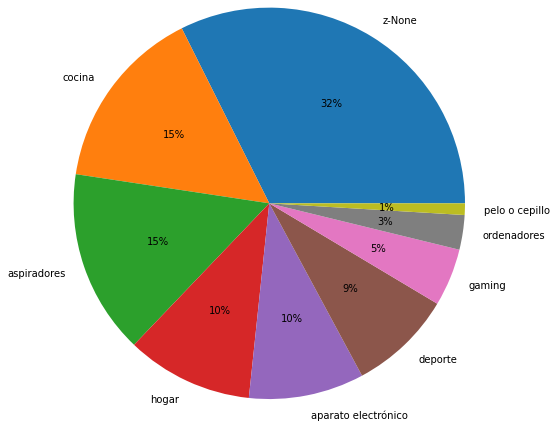

In [ ]:
#------------------------------------------------------------------------------------
# Incluye las categorías que quieras
# ej candidatos = ['perro', 'gato', 'pájaro', 'arbol']
candidatos = ['cocina', 'aspiradores', 'deporte', 'ordenadores', 'gaming', 'pelo o cepillo', 'hogar', 'aparato electrónico']
#------------------------------------------------------------------------------------
# opcionales para afinar la clasificación
masdeUnaClase = True # False devuelve sólo la categoría más afín. True devolverá todas las categorías que tengan una similitud > minimoSimilitud
IncluirH2 = True # usa title y h2 para la clasificación (Más fiable pero más lento). IncluirH2 = False solo usa title
minimoSimilitud = 0.85 # La escala de la similitud varía entre 0 y 1 (0 significa que no está relacionado). El script devuelve las categorías que tengan una similitud mayor que el minimoSimilitud seleccionado.
#------------------------------------------------------------------------------------

# sólo pillo aquellas que den código 200 y tengan title
codigos200 = web[(web['status'] == 200) & (web['title'].isna() ==False)]

# Funciones varias
def rotulos(rotulo):
  print("\n\n")
  print("-----------------------------------------------------------------")
  print(rotulo)
  print("-----------------------------------------------------------------")

from google.colab import data_table
def pasarATabla(dataframe0, Nlineas=10):
  tabla = data_table.DataTable(dataframe0, include_index=False, num_rows_per_page=Nlineas)
  display(tabla)

def pasarListaATabla(lista,columnas):
  lista = pd.DataFrame (lista, columns = columnas )
  lista = data_table.DataTable(lista, include_index=True, num_rows_per_page=20)
  display(lista)

corpus = "title"

if IncluirH2:
  # Con esta opción uso title + title + h2 para clasificar (2 veces title para darle más fuerza)
  codigos200 = codigos200[["url","title", "h2", "body_text"]]
  corpus = "title-h2"
  codigos200 = codigos200[["url","title", "h2", "body_text"]]
  codigos200[corpus] = codigos200["title"] + '. ' + codigos200["title"] +  '. ' + codigos200["h2"] + '. '
  codigos200 = codigos200[codigos200[corpus].isna() ==False] # Manías, no debería  haber ninguno nulo...
  codigos200[corpus] = codigos200[corpus].str.replace("@@", ". ")
else:
  codigos200 = codigos200[["url","title"]]
  codigos200 = codigos200[codigos200["title"].isna() ==False]



contarCat = []

#candidatos = [x.lower() for x in candidatos]
# Al lio, toca clasificar
def clasificar2(texto, minSimilitud = 0.8, multiple = False):
  clasi = classifier(texto, candidate_labels=candidatos, hypothesis_template="Este ejemplo trata sobre {}.", multi_label=True) #texto.lower()
  # recupero puntuaciones
  puntuaciones = clasi['scores']
  #filtro por mínima similitud
  puntuaciones = [x for x in puntuaciones if x > minSimilitud]

  # si ninguno cumple devuelvo z-None
  if len(puntuaciones)== 0:
    contarCat.append("z-None")
    return pd.Series(["z-None", 0])

  # recupero las categorías
  temas = clasi['labels']
  temas = temas[:len(puntuaciones)]

  contarCat.append(temas[0]) # uso categoría principal para gráfico de quesitos
  if multiple == False:
    # devulve una categoria y su puntuación
    return pd.Series([temas[0], round(puntuaciones[0], 2)])
  else:
    # devuelve varias categorias y su media de puntuación
    return pd.Series([" / ".join(sorted(temas)), round(mean(puntuaciones), 2)])

# marchando una progress bar
from tqdm import tqdm
tqdm.pandas()

# que empiecen los juegos del hambre => clasifica que clasifica
codigos200[['categoria', 'puntuación']] = codigos200[corpus].progress_apply(lambda x: clasificar2(x,  minSimilitud = minimoSimilitud, multiple = masdeUnaClase))

# Huevo de pascua super escondido 😉
rotulos("Amigo SEO... no renuncies a tus sueños => Sigue durmiendo 😂")

# Paso resultados clasificación a tabla
interesantes = ['url', 'categoria', 'puntuación', 'title']
if IncluirH2: interesantes.append(corpus)
finales = codigos200[interesantes]
finales = finales.sort_values(['categoria', 'puntuación'], ascending= [True, False])
pasarATabla(finales, 25)

# Muestro gráfica de quesos con las categorías
from collections import Counter
import matplotlib.pyplot as plt

# cuento las categorías
categorias = Counter(contarCat).most_common()

rotulos("Esta gráfica muestra sólo la categoría más afín de cada url")
pie, ax = plt.subplots(figsize=[10,6])
plt.pie([x[1] for x in categorias], labels = [x[0] for x in categorias],  autopct='%.0f%%', radius=1.5)
plt.show()